# Skills Trend
## How are in-demand skills trending for Data Analysts?
### Methodology
1) Aggregate skill counts monthly
2) Re-analyze based on percentage of total_jobs
3) Plot the monthly skill demand

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv('data_jobs_dataset.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'],dayfirst=True)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.head()

,Unnamed: 0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:00,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:00,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:00,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:00,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:00,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              752674
salary_year_avg          763738
salary_hour_avg          775079
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [4]:
df.drop(columns=['job_location','job_via','salary_rate','salary_hour_avg'],inplace=True)

In [5]:
df.columns

Index(['Unnamed: 0', 'job_title_short', 'job_title', 'job_schedule_type',
       'job_work_from_home', 'search_location', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'salary_year_avg', 'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_year_avg          763738
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [7]:
df_DA = df[df['job_title'] == 'Data Analyst'].copy()

In [8]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [9]:
df_DA_explode = df_DA.explode('job_skills')

In [10]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,0,0,1,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,0
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,0,0,0,1,0,0,0,1
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,1,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,0,0,0,0,0


## Plot the Monthly Skill Counts
Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

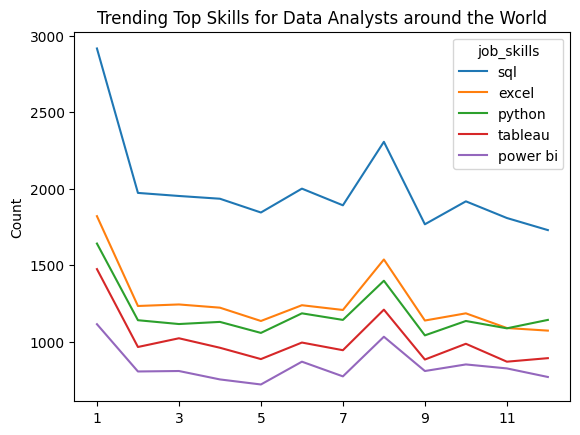

In [11]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts around the World')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [12]:
DA_totals = df_DA.groupby('job_posted_month_no').size()

In [13]:
df_DA_percent = df_DA_pivot.div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_percent = df_DA_percent.reset_index()
df_DA_percent['job_posted_month'] = df_DA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_percent = df_DA_percent.set_index('job_posted_month')
df_DA_percent = df_DA_percent.drop(columns='job_posted_month_no')

df_DA_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,58.577742,36.560868,32.965046,29.610285,22.378465,17.095219,18.320611,6.126959,6.528726,5.825633,...,0.000000,0.000000,0.000000,0.020088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,57.829912,36.158358,33.431085,28.299120,23.607038,17.272727,17.008798,7.478006,6.715543,6.217009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,57.940042,36.895221,33.095874,30.335411,23.983378,17.393885,16.503413,6.055209,6.559810,6.589492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029682,0.000000,0.000000,0.000000
Apr,59.361572,37.507673,34.653161,29.465930,23.112339,17.771639,15.715163,5.985267,6.599141,7.213014,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.120318,37.620152,35.034803,29.366921,23.864766,18.495194,13.258204,6.065628,6.496520,5.535300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,59.364797,36.746809,35.173642,29.504304,25.794004,18.670229,14.959929,6.173939,6.262986,6.678540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,59.204759,37.789606,35.754540,29.555416,24.201628,19.035692,14.214152,6.011271,6.073889,6.073889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.031309,0.000000,0.000000,0.000000,0.031309
Aug,56.025267,37.342080,33.965015,29.373178,25.072886,18.148688,13.848397,5.685131,5.466472,5.126336,...,0.000000,0.000000,0.000000,0.000000,0.024295,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.909882,35.363580,32.349285,27.439403,25.108763,16.190180,13.238036,5.686762,3.946551,4.101927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand
Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the df_DA_pivot_percent DataFrame. Also the legend is moved outside of the plot for readability.

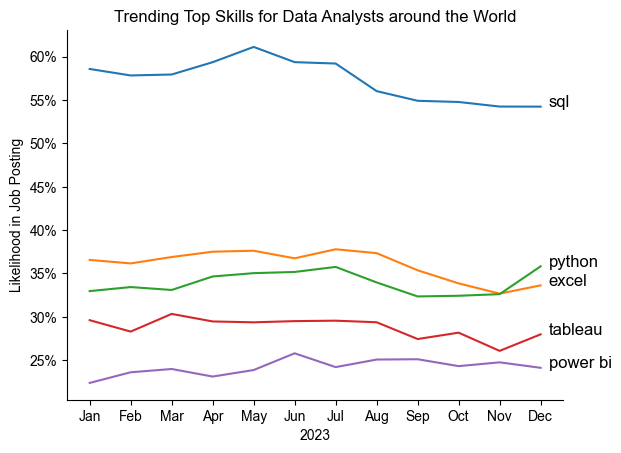

In [14]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts around the World')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()